### Salary Prediction 

#### In this project we are going to analyze a dataset to make predictions of salary for a new employee

### Outlier clipped duplicate removed education not clubbed, age not categorized.
## With smote

In [152]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset into a dataframe 

data = pd.read_csv('salarydata.csv')

In [3]:
# display first 5 records

data.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# display shape of data 

data.shape

(32561, 14)

In [5]:
#describe data

data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [7]:
columns = ['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary']
print("%20s %15s   %15s %15s" % ("Column Name", "Data Type", "Distinct Count", "Null Values"))
for col in data.columns:
    data_type = data[col].dtype
    uniq = data[col].nunique()
    na = data[col].isna().sum()
    print("%20s %15s %15s %15s" % (col, data_type, uniq, na))

         Column Name       Data Type    Distinct Count     Null Values
                 age           int64              73               0
           workclass          object               9               0
           education          object              16               0
       education-num           int64              16               0
      marital-status          object               7               0
          occupation          object              15               0
        relationship          object               6               0
                race          object               5               0
                 sex          object               2               0
        capital-gain           int64             119               0
        capital-loss           int64              92               0
      hours-per-week           int64              94               0
      native-country          object              42               0
              salary          ob

In [8]:
# occurrence based on all columns
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
352,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
391,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
563,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
570,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
673,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32512,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [9]:
duplicate.shape

(3465, 14)

In [10]:
# 3456 rows are duplicated we can remove these

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(29096, 14)

#### Exploratory Data Analysis and Preprocessing

In [13]:
# Univariate Analysis

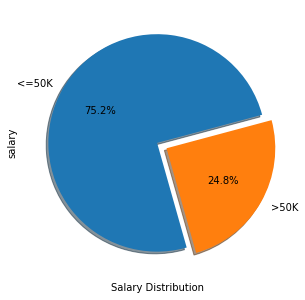

In [14]:
# Analyzing Target salary 
plt.figure(figsize=(5,5))
data['salary'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,startangle=15)
plt.xlabel("Salary Distribution")
plt.show()

In [15]:
data['salary'].value_counts()

<=50K    21886
>50K      7210
Name: salary, dtype: int64

In [16]:
# The target salary seems to have unbalanced data <=50K class has 75.9% values but the other class seems to have only 24.1%

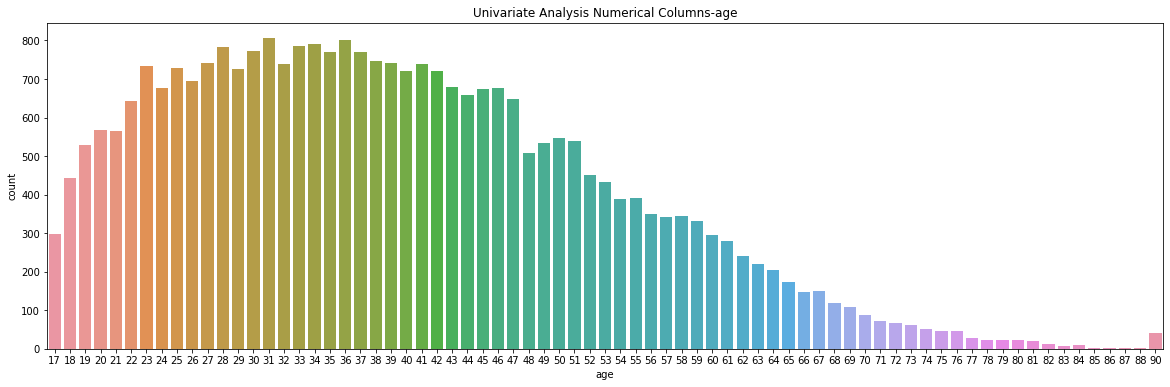

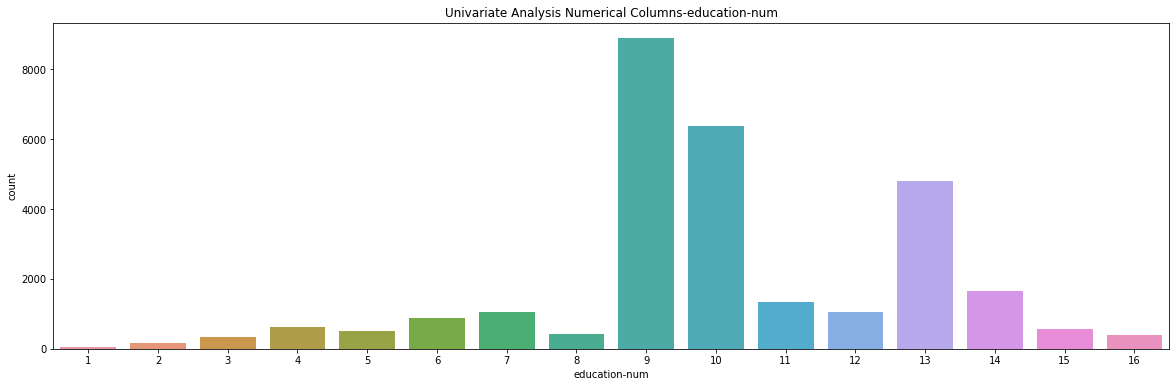

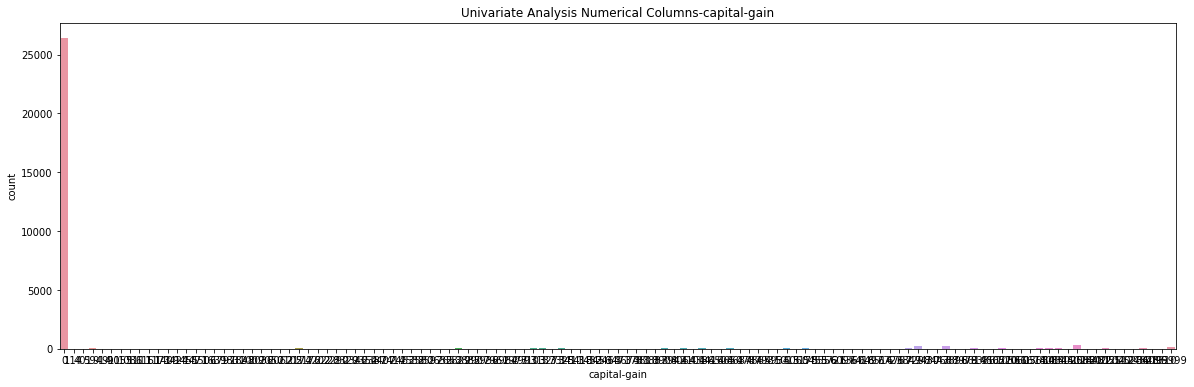

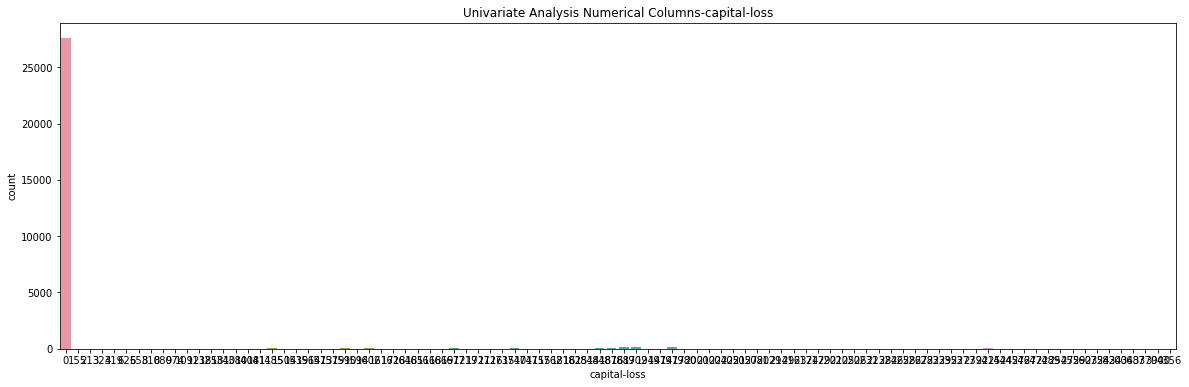

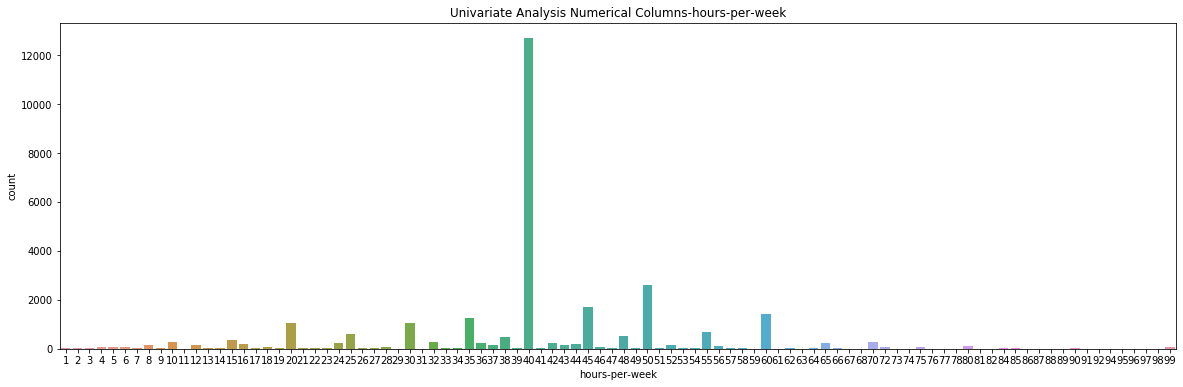

In [17]:
# Exploratory Data Analysis

col = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

for i in col:
    plt.figure(figsize=(20,6))
    sns.countplot(x=i, data=data)
    plt.title(f'Univariate Analysis Numerical Columns-{i}')
    plt.show()

C:\Users\akshathi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


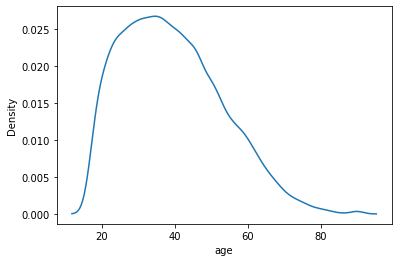

In [18]:
sns.set_color_codes()
sns.distplot(data['age'],hist=False)
plt.show()

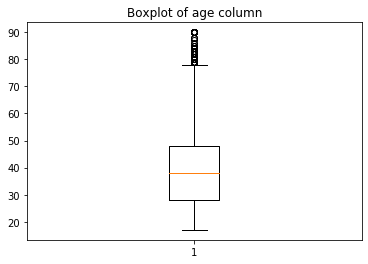

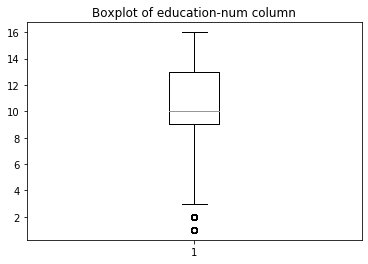

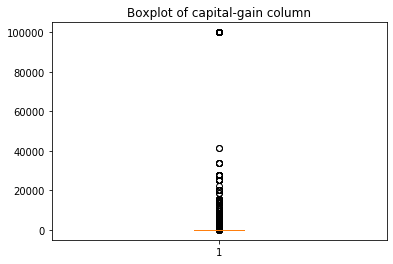

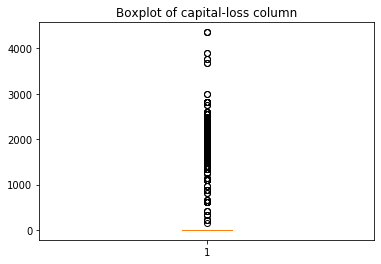

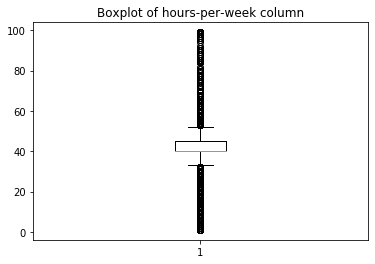

In [19]:
# Plotting box plot of numerical
col = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

for i in col:
    plt.boxplot(data[i])
    plt.title(f'Boxplot of {i} column')
    plt.show()

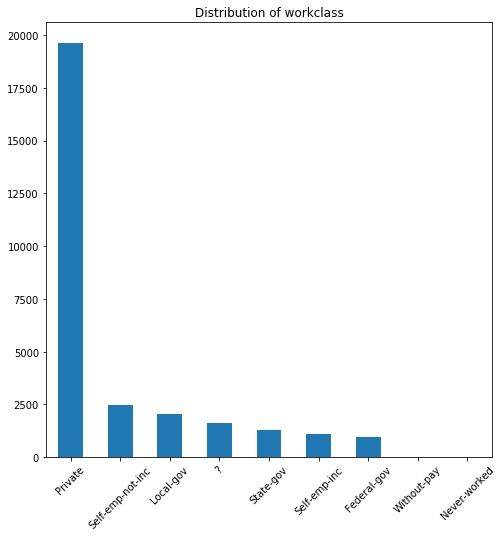

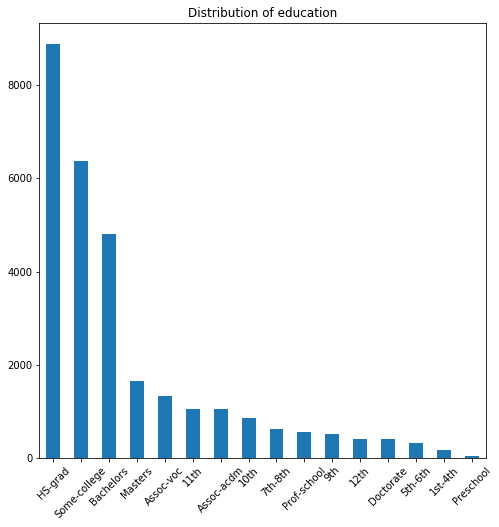

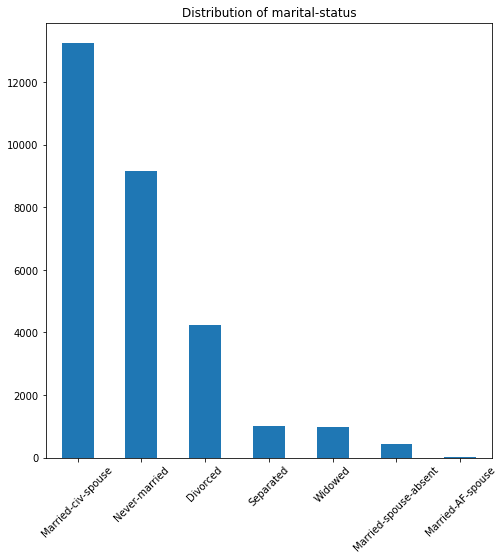

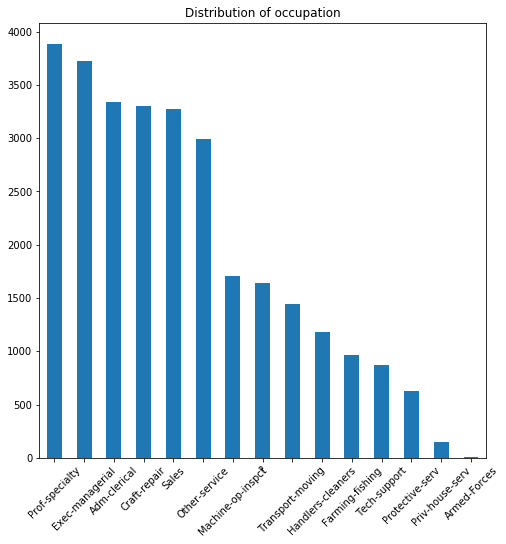

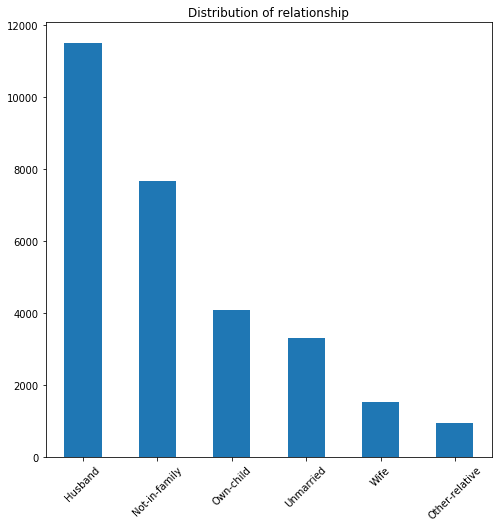

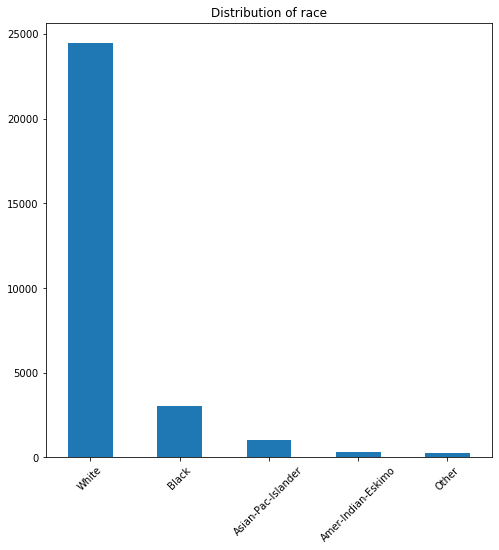

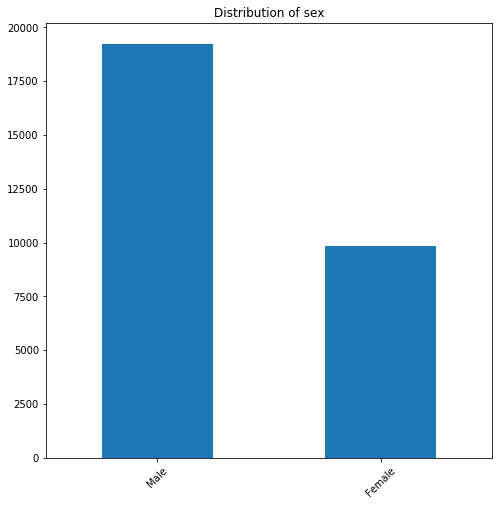

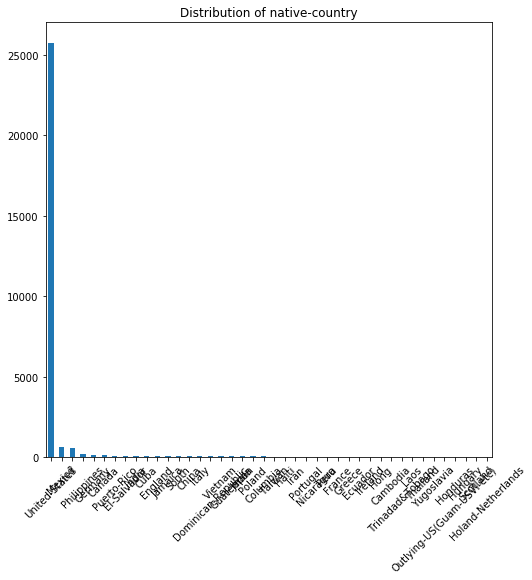

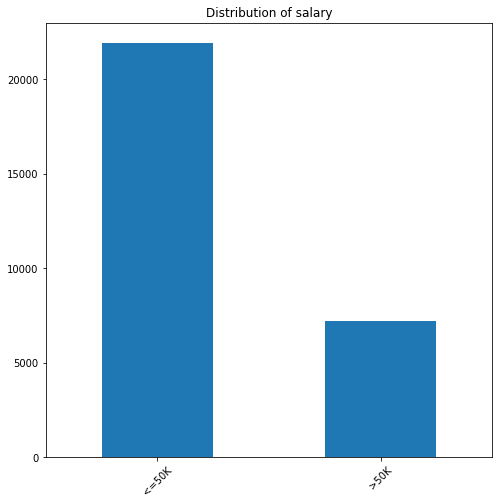

In [20]:
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for col in columns:
    plt.figure(figsize=(8,8))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [21]:
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for col in columns:
    print(f'Distribution of {col}')
    print(data[col].nunique())
    print(data[col].value_counts())

Distribution of workclass
9
Private             19621
Self-emp-not-inc     2473
Local-gov            2040
?                    1632
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Distribution of education
16
HS-grad         8886
Some-college    6378
Bachelors       4810
Masters         1653
Assoc-voc       1331
11th            1056
Assoc-acdm      1053
10th             867
7th-8th          629
Prof-school      566
9th              507
12th             414
Doctorate        402
5th-6th          328
1st-4th          166
Preschool         50
Name: education, dtype: int64
Distribution of marital-status
7
Married-civ-spouse       13249
Never-married             9173
Divorced                  4237
Separated                 1014
Widowed                    982
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
Distribution of occupation
1

In [22]:
## It is seen that all the columns doent contain any null values. 
# But certain columns such as workclass, occupation contain erronneous value '?' this can be
#removed
#relationship and education-num can be removed

In [23]:
# Bivariate Analysis

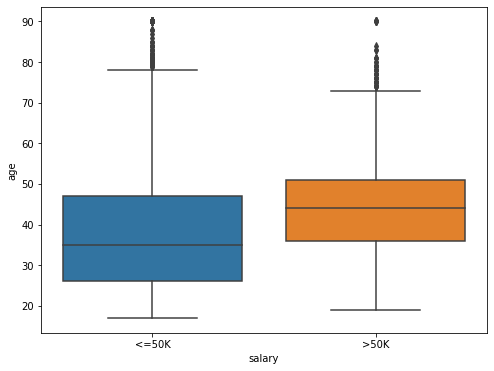

In [24]:
# Income wrt age
plt.figure(figsize=(8,6))
sns.boxplot(x='salary',y='age',data=data)
plt.show()

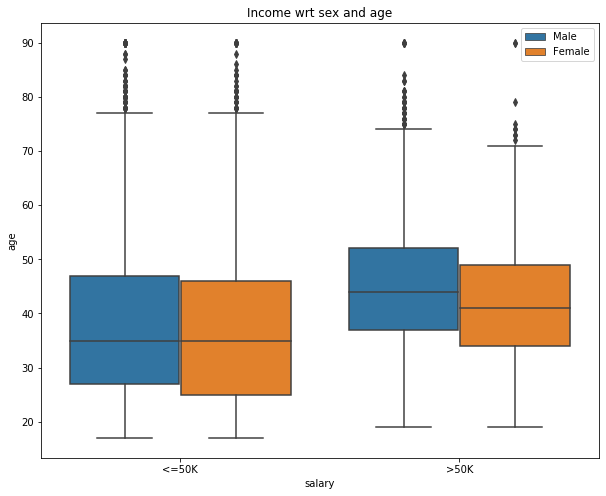

In [25]:
# Income w.r.t sex and age
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='age',hue='sex',data=data)
ax.set_title("Income wrt sex and age")
ax.legend(loc='best')
plt.show()

No handles with labels found to put in legend.


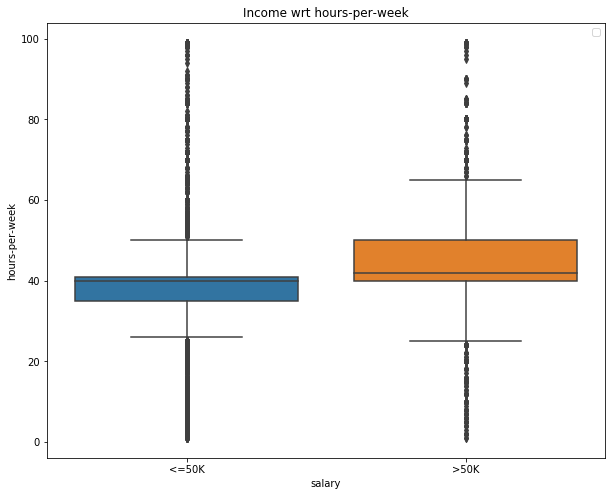

In [26]:
# Income w.r.t hours-per-week
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='hours-per-week',data=data)
ax.set_title("Income wrt hours-per-week")
ax.legend(loc='best')
plt.show()

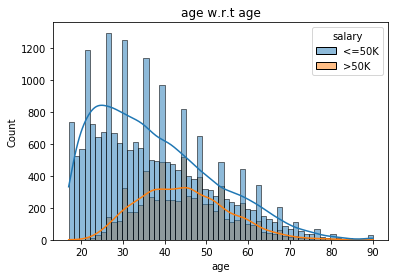

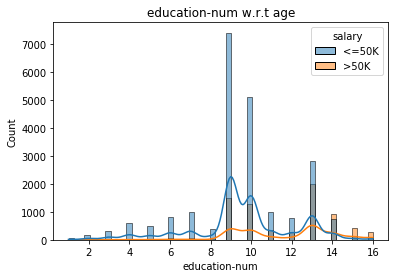

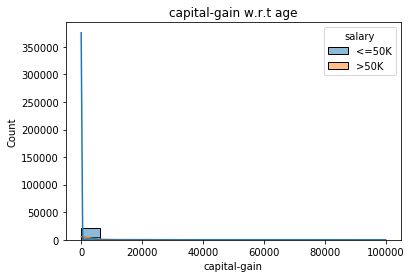

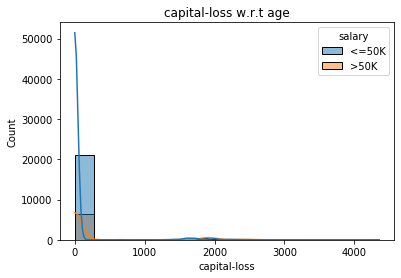

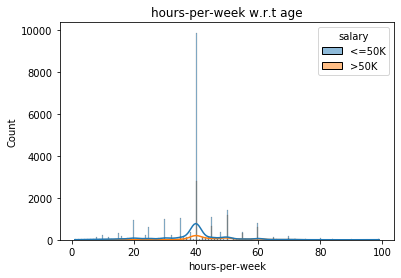

In [27]:
# Plot Histogram - target vs numerical columns

col = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

for i in col:
    sns.histplot(data = data, x = i, kde = True, hue = "salary")
    plt.title(f'{i} w.r.t age')
    plt.show()

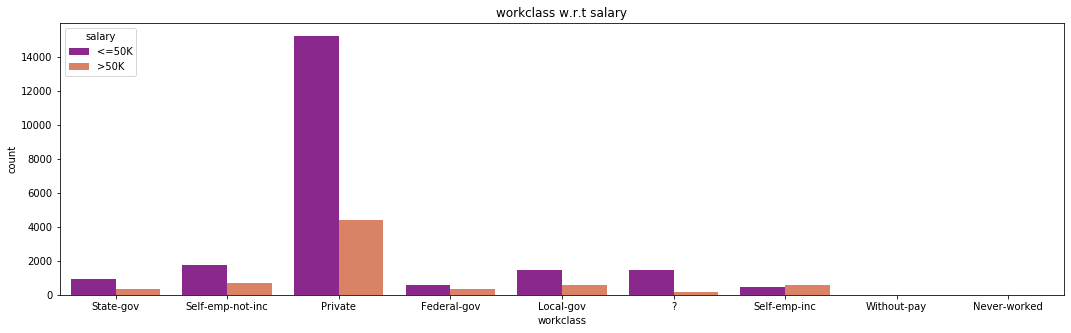

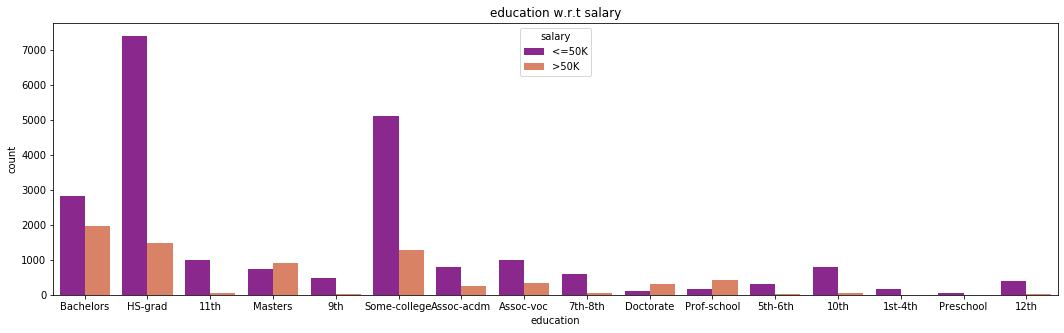

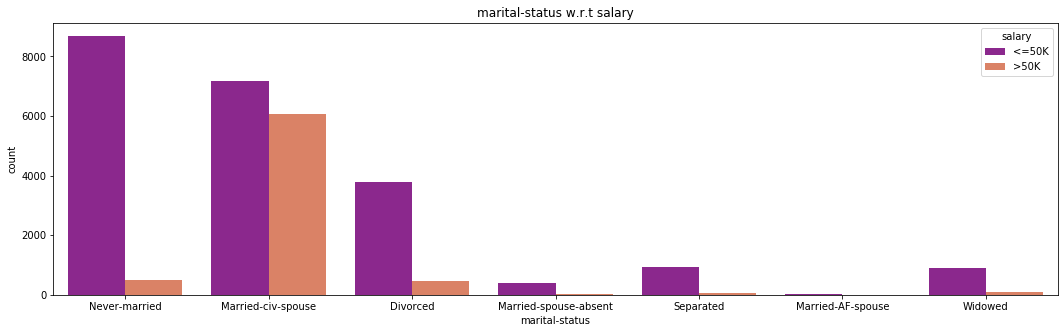

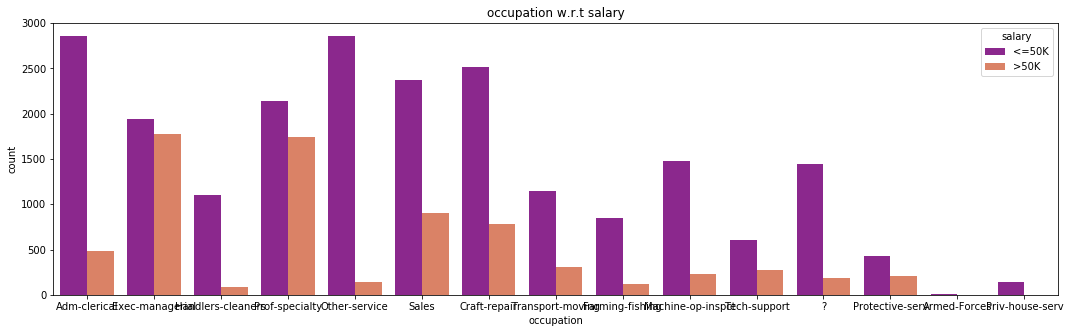

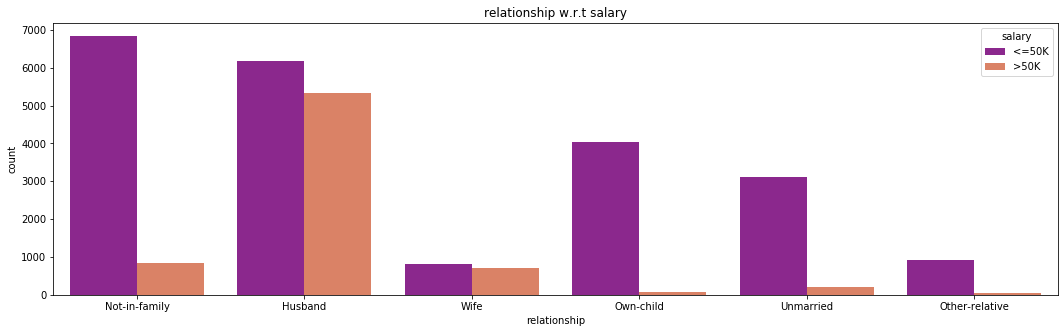

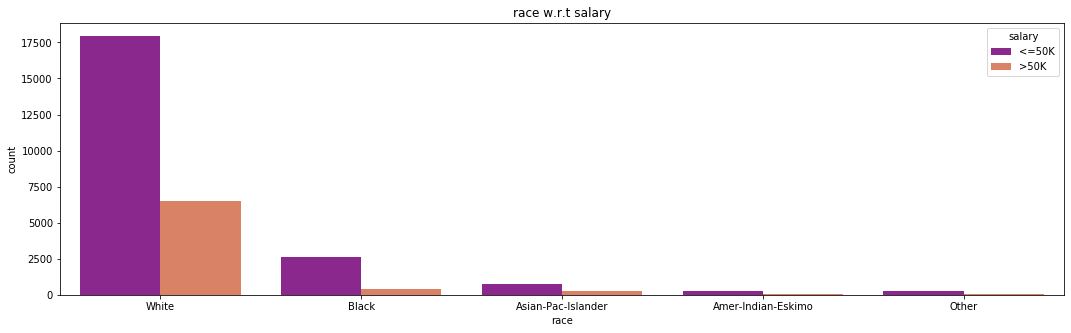

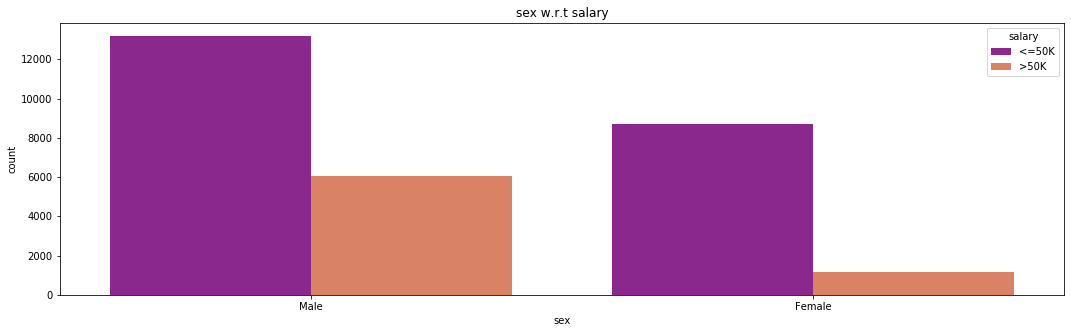

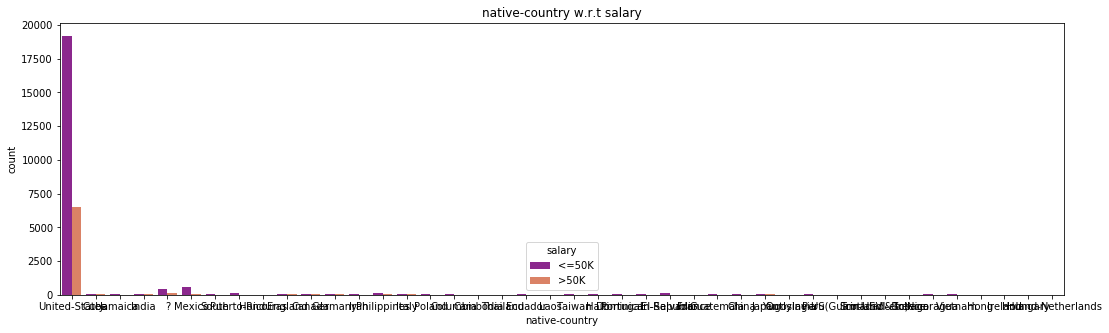

In [28]:
# Salary and categorical columns
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in columns:
    plt.figure(figsize=(18,5))
    sns.countplot(x=data[col],hue=data['salary'],palette='plasma')
    plt.title(f'{col} w.r.t salary')
    plt.show()

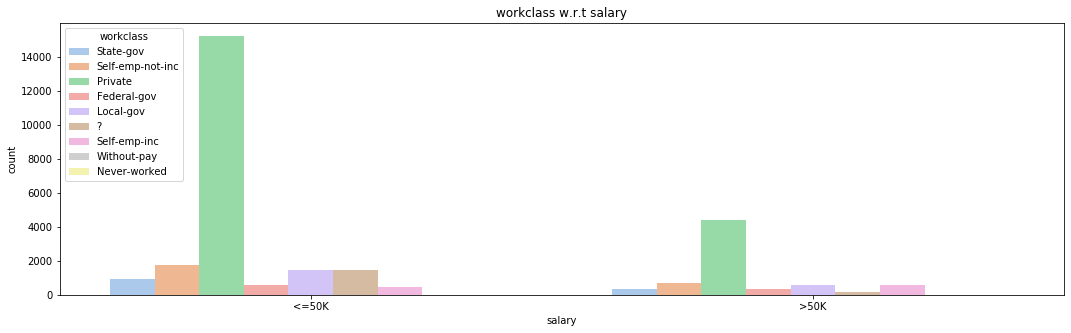

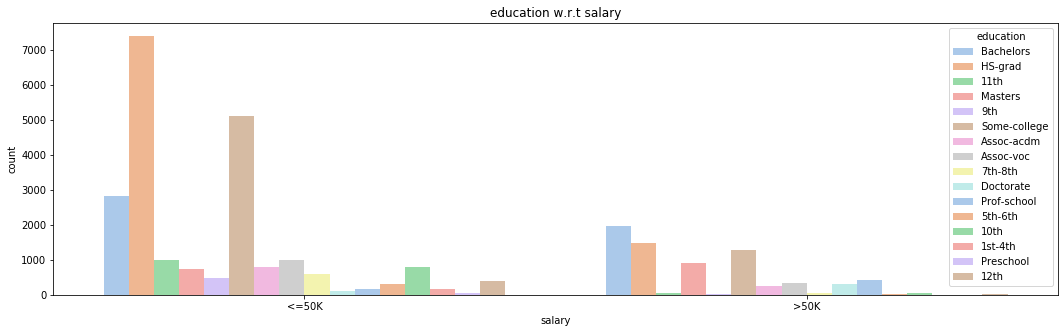

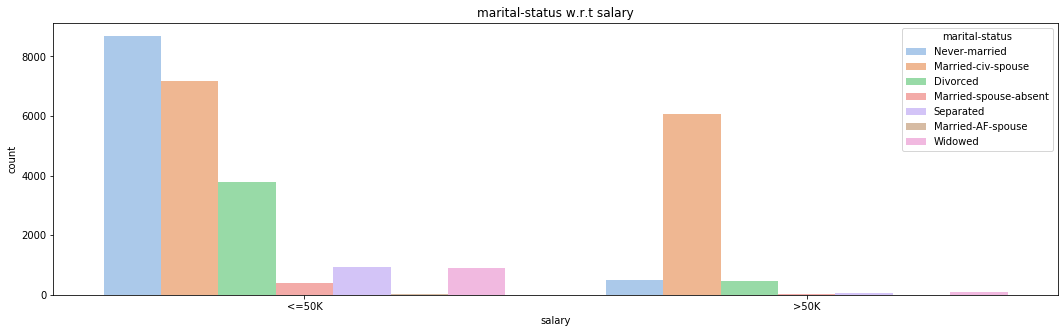

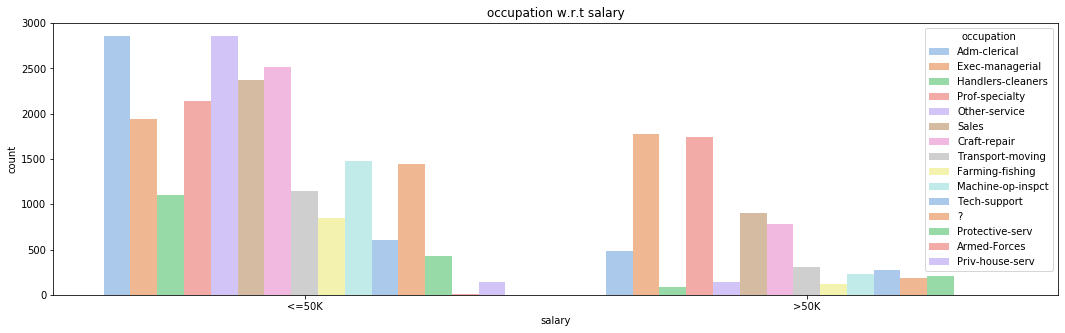

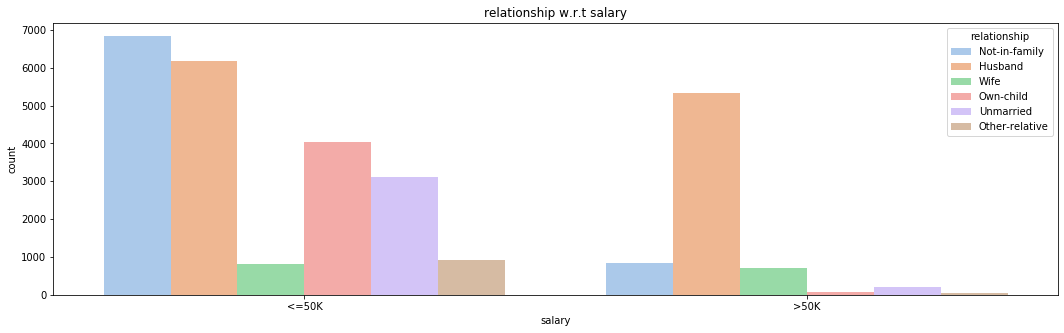

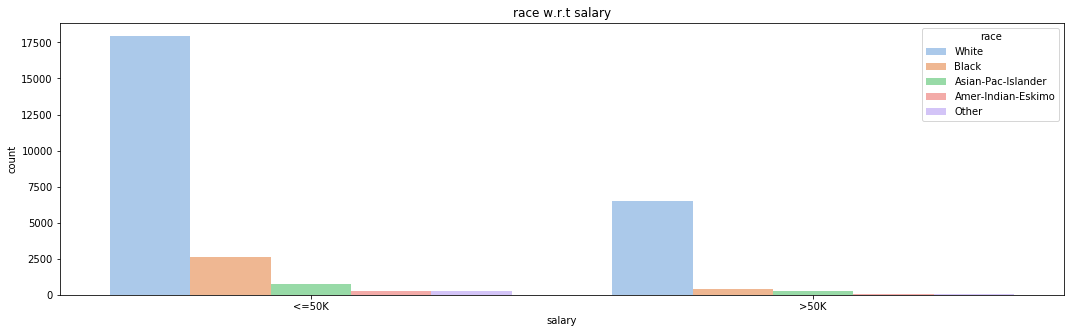

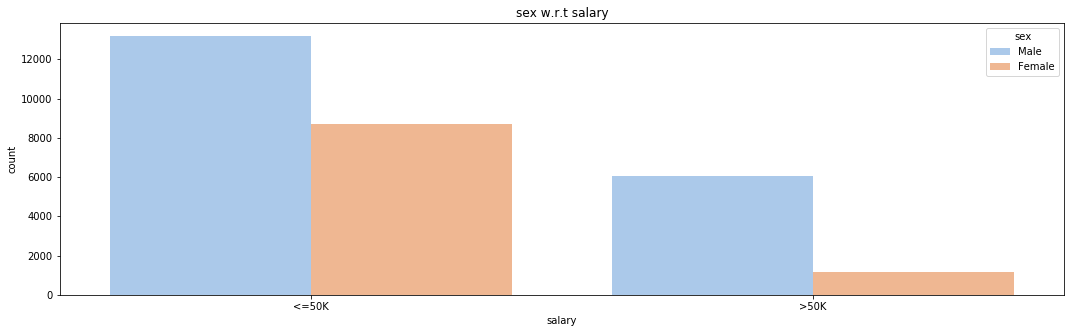

In [29]:
# Salary and categorical columns
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for col in columns:
    plt.figure(figsize=(18,5))
    sns.countplot(x=data['salary'],hue=data[col],palette='pastel')
    plt.title(f'{col} w.r.t salary')
    plt.show()

In [30]:
# dropping education-num and relationship columns
data.drop(['education-num','relationship','race'], axis=1, inplace=True)

In [31]:
# Encoding salary column 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['salary'] = label_encoder.fit_transform(data['salary'])
print(label_encoder.classes_)

['<=50K' '>50K']


In [32]:
# Multivariate Analysis
data.corr()['salary'][:].sort_values(ascending=False)


salary            1.000000
capital-gain      0.230696
hours-per-week    0.226323
age               0.215270
capital-loss      0.153277
Name: salary, dtype: float64

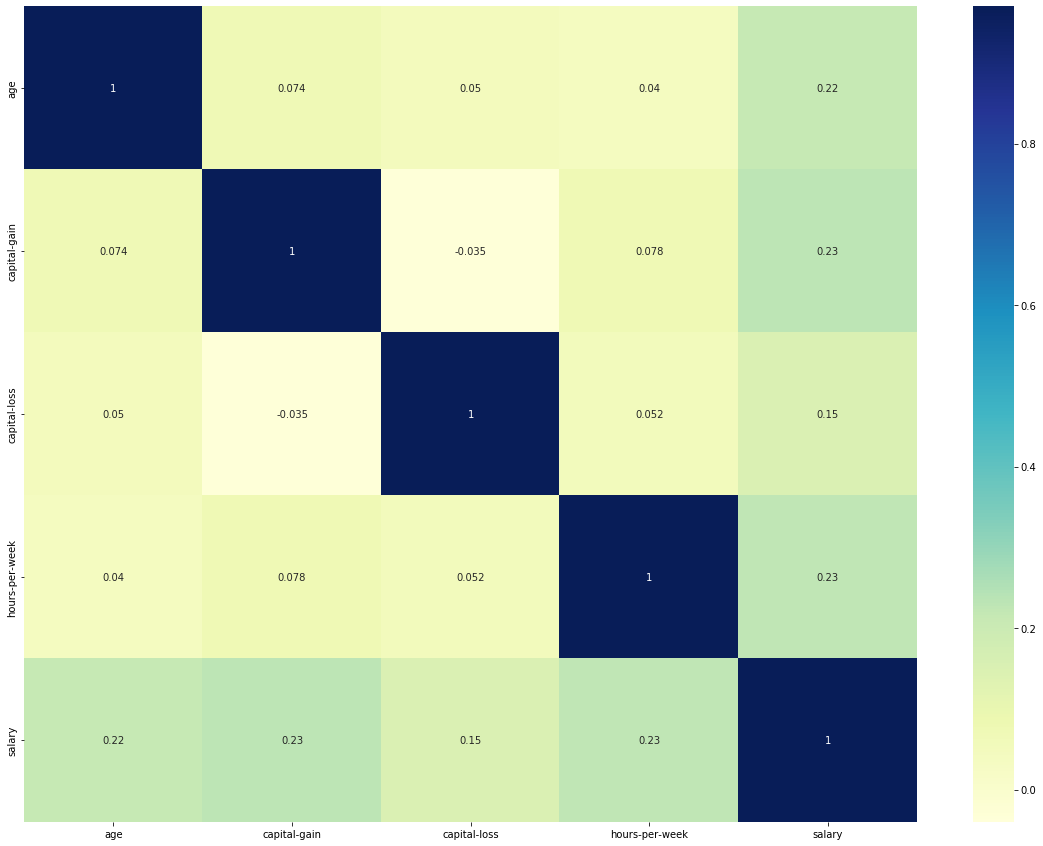

In [33]:
#plotting correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

In [34]:
# can remove columns capital gain,capital-loss and native-country since they do not contribute much to target salary

#### Handling Missing Values

In [35]:
#data.drop(['capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [36]:
#Finding the ? in the data frame 
data.isin(['?']).sum(axis=0)

age                  0
workclass         1632
education            0
marital-status       0
occupation        1639
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     580
salary               0
dtype: int64

In [37]:
# code will replace the ? to NaN and then drop the columns 

data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
#dropping the NaN rows 
data.dropna(how='any',inplace=True)

In [38]:
#Finding the ? in the data frame 
data.isin(['?']).sum(axis=0)

age                 0
workclass           0
education           0
marital-status      0
occupation          0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    553
salary              0
dtype: int64

In [39]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

#### Handling Outliers

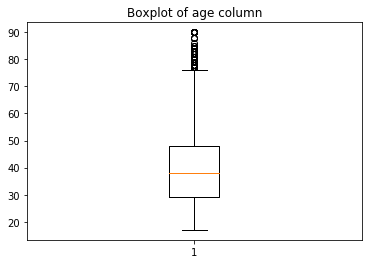

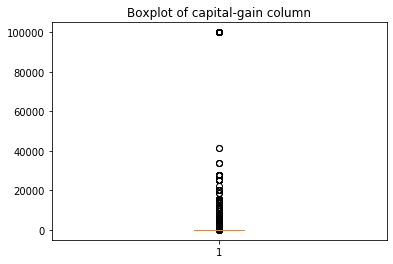

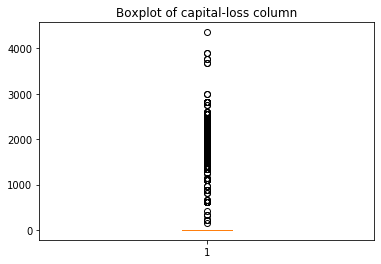

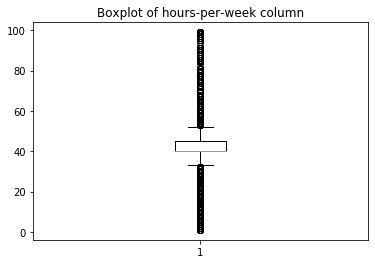

In [40]:
# Plotting box plot of numerical
columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in columns:
    plt.boxplot(data[col])
    plt.title(f'Boxplot of {col} column')
    plt.show()

In [41]:
#### IQR method to find Outliers in age

In [42]:
Q1 = np.percentile(data['age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['age'], 75, interpolation='midpoint')

In [43]:
data['age'].min()

17

In [44]:
print(Q1)
print(Q2)
print(Q3)

29.0
38.0
48.0


In [45]:
# Finding Inter Quartile Range 
IQR = Q3-Q1
print(IQR)

19.0


In [46]:
# Finding upper and lower limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.5
76.5


In [47]:
outlier = []
for x in data['age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [48]:
data['age'] = np.where(data['age'] > up_lim,
    up_lim, np.where(
        data['age'] < low_lim,
        low_lim,data['age']))

In [49]:
data['age']

0        39.0
1        50.0
2        38.0
3        53.0
4        28.0
         ... 
32554    53.0
32555    22.0
32556    27.0
32558    58.0
32560    52.0
Name: age, Length: 27457, dtype: float64

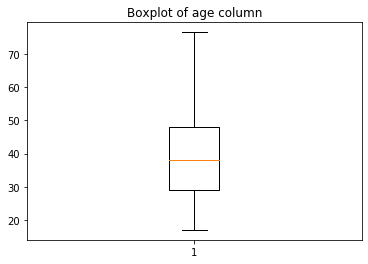

In [50]:
plt.boxplot(data['age'])
plt.title(f'Boxplot of age column')
plt.show()

In [51]:
# function to group age into different classes
def hour_class(n):
    if n <= 35:
        return '<=35'
    elif n > 35 and n <=40:
        return '>35, <=40'
    elif n >40:
        return '>40'

In [52]:
data['hours-per-week'] = data['hours-per-week'].apply(lambda x:hour_class(x))

In [53]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [54]:
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,">35, <=40",United-States,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,<=35,United-States,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,">35, <=40",United-States,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,">35, <=40",United-States,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,">35, <=40",Cuba,0


In [55]:
# mapping categorical values to numerical values

In [56]:
columns =['workclass', 'education', 'marital-status', 'hours-per-week', 'occupation', 'sex']
for col in columns:
    labels = data.groupby(col)['salary'].mean().sort_values().index
    print(col,'\n',labels,'\n')

workclass 
 Index(['Without-pay', 'Private', 'State-gov', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc'],
      dtype='object', name='workclass') 

education 
 Index(['Preschool', '1st-4th', '5th-6th', '9th', '11th', '7th-8th', '10th',
       '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Masters', 'Doctorate', 'Prof-school'],
      dtype='object', name='education') 

marital-status 
 Index(['Never-married', 'Separated', 'Married-spouse-absent', 'Widowed',
       'Divorced', 'Married-civ-spouse', 'Married-AF-spouse'],
      dtype='object', name='marital-status') 

hours-per-week 
 Index(['<=35', '>35, <=40', '>40'], dtype='object', name='hours-per-week') 

occupation 
 Index(['Priv-house-serv', 'Other-service', 'Handlers-cleaners', 'Armed-Forces',
       'Farming-fishing', 'Machine-op-inspct', 'Adm-clerical',
       'Transport-moving', 'Craft-repair', 'Sales', 'Tech-support',
       'Protective-serv', 'Prof-specialty', 'Exec-m

In [57]:
# Encoding all categorical values
for col in columns:
    labels = data.groupby(col)['salary'].mean().sort_values().index
    mapping_dict = {k: i for i, k in enumerate(labels, 0)}
    # apply encoding to our data
    data[col] = data[col].map(mapping_dict)

In [58]:
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,2,12,0,6,1,2174,0,1,United-States,0
1,50.0,3,12,5,13,1,0,0,0,United-States,0
2,38.0,1,8,4,2,1,0,0,1,United-States,0
3,53.0,1,4,5,2,1,0,0,1,United-States,0
4,28.0,1,12,5,12,0,0,0,1,Cuba,0


In [59]:
# Multivariate Analysis
data.corr()['salary'][:].sort_values(ascending=False)


salary            1.000000
marital-status    0.387616
education         0.332353
occupation        0.332000
hours-per-week    0.259025
capital-gain      0.229446
age               0.226444
sex               0.217247
capital-loss      0.154540
workclass         0.148987
Name: salary, dtype: float64

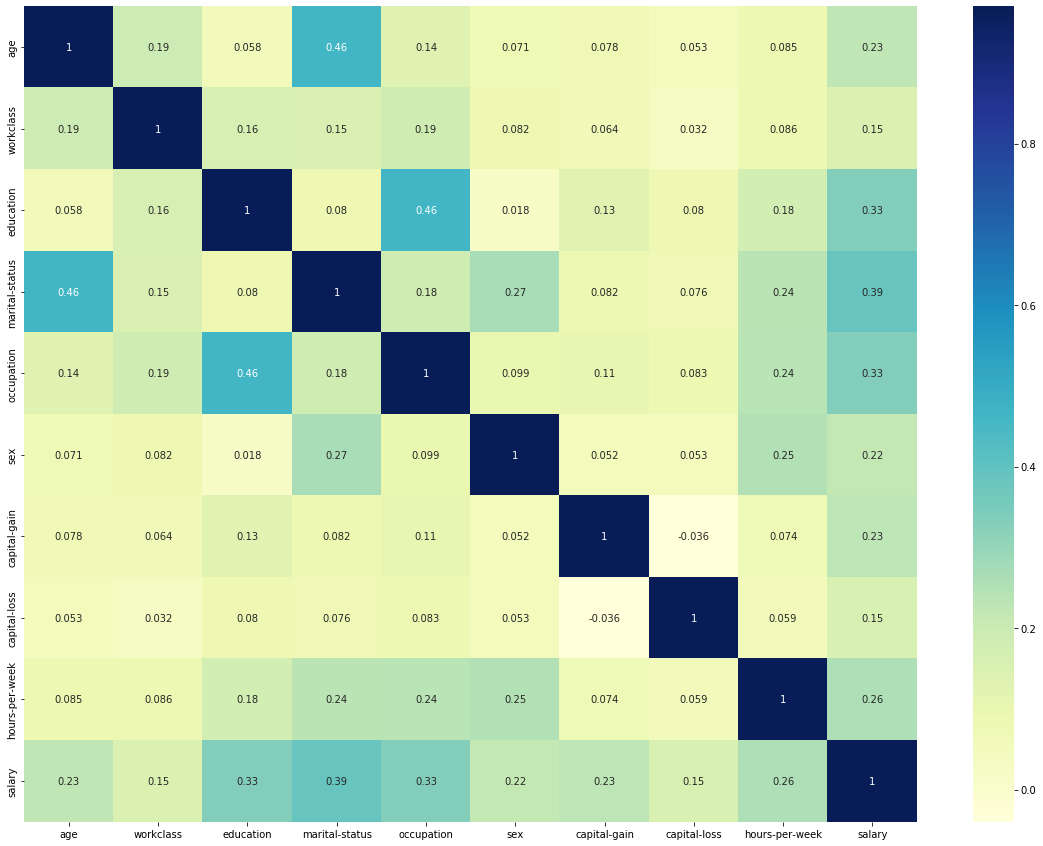

In [60]:
#plotting correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix, annot=True,vmin=-.04, vmax=0.97, cmap="YlGnBu")
plt.show()

In [61]:
#data['salary'] = data['salary'].map({0: '<=50K', 1: '>50K'})


In [62]:
data.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,2,12,0,6,1,2174,0,1,United-States,0
1,50.0,3,12,5,13,1,0,0,0,United-States,0
2,38.0,1,8,4,2,1,0,0,1,United-States,0
3,53.0,1,4,5,2,1,0,0,1,United-States,0
4,28.0,1,12,5,12,0,0,0,1,Cuba,0


In [63]:
data.drop(['capital-gain', 'capital-loss', 'native-country'], axis=1, inplace=True)

In [64]:
### Splitting into target and features
X = data.drop('salary',axis=1)
y = data['salary']

In [65]:
X.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week
0,39.0,2,12,0,6,1,1
1,50.0,3,12,5,13,1,0
2,38.0,1,8,4,2,1,1
3,53.0,1,4,5,2,1,1
4,28.0,1,12,5,12,0,1


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols=['age']
X.loc[:,num_cols] = sc.fit_transform(X[num_cols])

In [67]:
X.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week
0,-0.001000,2,12,0,6,1,1
1,0.840663,3,12,5,13,1,0
2,-0.077515,1,8,4,2,1,1
3,1.070208,1,4,5,2,1,1
4,-0.842664,1,12,5,12,0,1


In [68]:
### Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
## Since our data is unbalanced lets balance it using SMOTE

In [70]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [71]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('Before OverSampling, the shape of train_X:{}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y:{}'.format(y_train.shape))
print("Before OverSampling, counts of label '>50K': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '<=50K': {} \n".format(sum(y_train == 0)))
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '>50K': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '<=50K': {}".format(sum(y_train_res == 0)))

Before OverSampling, the shape of train_X:(21965, 7)
Before OverSampling, the shape of train_y:(21965,)
Before OverSampling, counts of label '>50K': 5668
Before OverSampling, counts of label '<=50K': 16297 

After OverSampling, the shape of train_X: (32594, 7)
After OverSampling, the shape of train_y: (32594,) 

After OverSampling, counts of label '>50K': 16297
After OverSampling, counts of label '<=50K': 16297


### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score

In [73]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train_res, y_train_res)
# Predicting the Test set results
y_pred_logit = logit_model.predict(X_test)


In [74]:
# Calculating Scores

lr_acc = accuracy_score(y_test, y_pred_logit)
lr_re = recall_score(y_test, y_pred_logit)
lr_f1 = f1_score(y_test, y_pred_logit)
lr_pr = precision_score(y_test, y_pred_logit)

In [75]:
summary = pd.DataFrame([[lr_acc],[lr_re],[lr_f1],[lr_pr]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.752185
Recall Score,0.801922
F1 Score,0.614557
Precision Score,0.498163


In [76]:
con_mat = confusion_matrix(y_test, y_pred_logit)

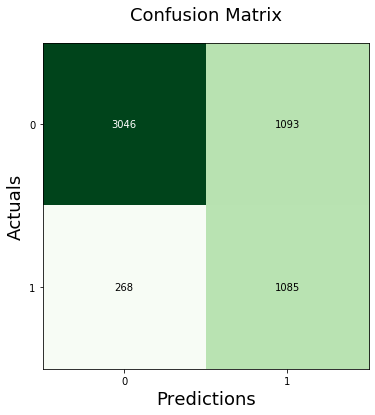

array([[3046, 1093],
       [ 268, 1085]], dtype=int64)

In [77]:
con_mat = confusion_matrix(y_test, y_pred_logit)
## Confusion Matrix Plot
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_logit)

### kNN Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train_res, y_train_res)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

In [80]:
metric_k

[0.7538237436270939,
 0.775673707210488,
 0.7554624908958485,
 0.7722141296431173,
 0.7567370721048798,
 0.7711216314639475,
 0.7569191551347414,
 0.7714857975236707,
 0.7583758193736344,
 0.7698470502549163,
 0.7572833211944647,
 0.7687545520757465]

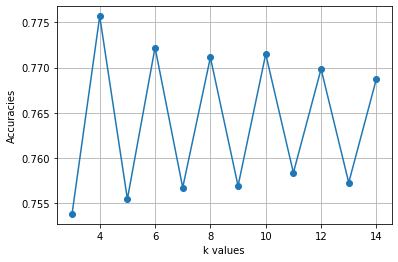

In [81]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [82]:
# Select k with maximum accuracy

In [83]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=4)
classifier = classifier.fit(X_train_res, y_train_res)
y_pred_kNN = classifier.predict(X_test)

In [84]:
# Calculating Scores
knn_acc = accuracy_score(y_test, y_pred_kNN)
knn_re = recall_score(y_test, y_pred_kNN)
knn_f1 = f1_score(y_test, y_pred_kNN)
knn_pre = precision_score(y_test, y_pred_kNN)

In [85]:
summary = pd.DataFrame([[knn_acc],[knn_re],[knn_f1],[knn_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.775674
Recall Score,0.631190
F1 Score,0.580952
Precision Score,0.538122


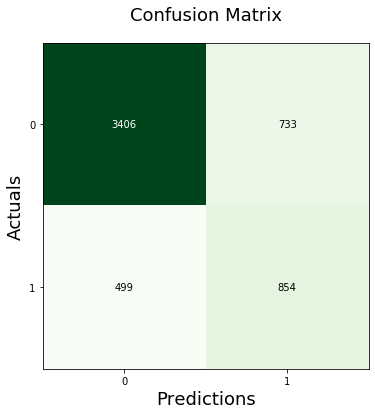

array([[3406,  733],
       [ 499,  854]], dtype=int64)

In [86]:
con_mat = confusion_matrix(y_test, y_pred_kNN)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_kNN)

### SVM

In [87]:
from sklearn.svm import SVC

In [88]:
# svm model kernel linear
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train_res, y_train_res)
# Predicting the Test set results
y_pred_svm = svm_clf.predict(X_test)

In [89]:
# Calculating Scores
svml_acc = accuracy_score(y_test, y_pred_svm)
svml_f1 = f1_score(y_test, y_pred_svm)
svml_pre = precision_score(y_test, y_pred_svm)
svml_re = recall_score(y_test, y_pred_svm)

In [90]:
summary = pd.DataFrame([[svml_acc],[svml_re],[svml_f1],[svml_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.737983
Recall Score,0.824834
F1 Score,0.608009
Precision Score,0.481450


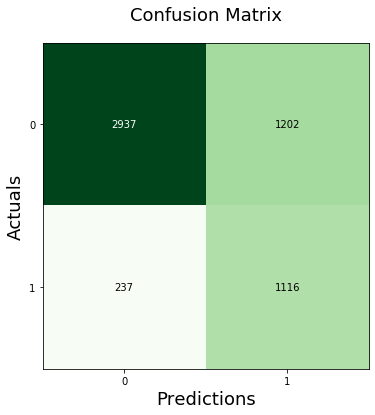

array([[2937, 1202],
       [ 237, 1116]], dtype=int64)

In [91]:
con_mat = confusion_matrix(y_test, y_pred_svm)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_svm)

In [92]:
# svm model kernel rbf

svm_clf1 = SVC(kernel='rbf')
svm_clf1 = svm_clf.fit(X_train_res, y_train_res)
y_pred_svmr = svm_clf.predict(X_test)

In [93]:
# Calculating Scores
svmr_acc = accuracy_score(y_test, y_pred_svmr)
svmr_re = recall_score(y_test, y_pred_svmr)
svmr_pre = precision_score(y_test, y_pred_svmr)
svmr_f1 = f1_score(y_test, y_pred_svmr)

In [94]:
summary = pd.DataFrame([[svmr_acc],[svmr_re],[svmr_f1],[svmr_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.737983
Recall Score,0.824834
F1 Score,0.608009
Precision Score,0.481450


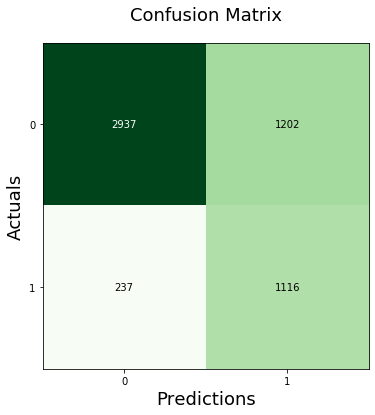

array([[2937, 1202],
       [ 237, 1116]], dtype=int64)

In [95]:
con_mat = confusion_matrix(y_test, y_pred_svmr)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_svmr)

### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train_res, y_train_res)
# Predicting the Test set results
y_pred_dt = dt_clf.predict(X_test)

In [97]:
# Calculating Scores
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_re = recall_score(y_test, y_pred_dt)
dt_pre = precision_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

In [98]:
summary = pd.DataFrame([[dt_acc],[dt_re],[dt_f1],[dt_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.750000
Recall Score,0.536585
F1 Score,0.513982
Precision Score,0.493207


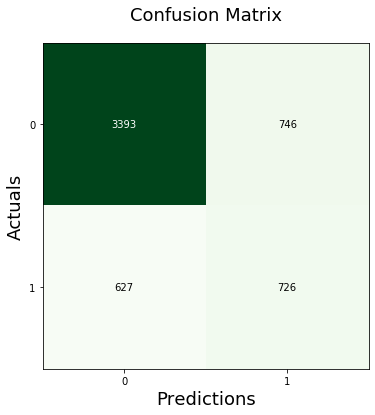

array([[3393,  746],
       [ 627,  726]], dtype=int64)

In [99]:
con_mat = confusion_matrix(y_test, y_pred_dt)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_dt)

### Random Forest

In [100]:
#Model
from sklearn.ensemble import RandomForestClassifier  
rf_clf = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_clf.fit(X_train_res, y_train_res)  
#Predicting the test set result  
y_pred_rf = classifier.predict(X_test)  

In [101]:
# Calculating Scores
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_re = recall_score(y_test, y_pred_rf)
rf_pre = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [102]:
summary = pd.DataFrame([[rf_acc],[rf_re],[rf_f1],[rf_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.775674
Recall Score,0.631190
F1 Score,0.580952
Precision Score,0.538122


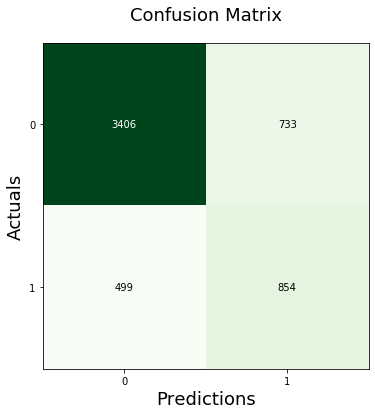

array([[3406,  733],
       [ 499,  854]], dtype=int64)

In [103]:
con_mat = confusion_matrix(y_test, y_pred_rf)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_rf)

### Naive Bayes

In [104]:
# Model 
from sklearn.naive_bayes import GaussianNB  
classifierNB = GaussianNB()  
classifierNB.fit(X_train_res, y_train_res)
# Predicting the Test set results  
y_pred = classifier.predict(X_test)  

In [105]:
# Calculating Scores
nb_acc = accuracy_score(y_test, y_pred)
nb_re = recall_score(y_test, y_pred)
nb_pre = precision_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

In [106]:
summary = pd.DataFrame([[nb_acc],[nb_re],[nb_f1],[nb_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.775674
Recall Score,0.631190
F1 Score,0.580952
Precision Score,0.538122


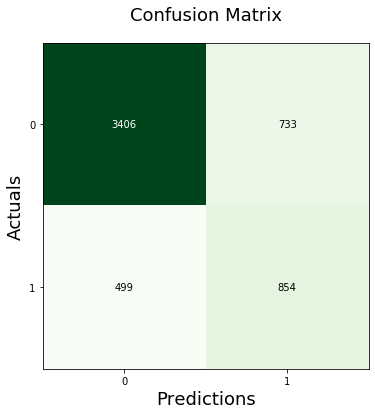

array([[3406,  733],
       [ 499,  854]], dtype=int64)

In [107]:
con_mat = confusion_matrix(y_test, y_pred)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred)

### XGBoost

In [108]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [109]:
### XGBoost
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train_res, y_train_res)
y_pred_xg = xgmodel.predict(X_test)

In [110]:
# Calculating Scores
xg_acc = accuracy_score(y_test, y_pred_xg)
xg_re = recall_score(y_test, y_pred_xg)
xg_pre = precision_score(y_test, y_pred_xg)
xg_f1 = f1_score(y_test, y_pred_xg)

In [111]:
summary = pd.DataFrame([[xg_acc],[xg_re],[xg_f1],[xg_pre]],index=['Accuracy Score','Recall Score', 'F1 Score', 'Precision Score'],columns=['Score'])
summary

,Score
Accuracy Score,0.817189
Recall Score,0.690318
F1 Score,0.650418
Precision Score,0.614878


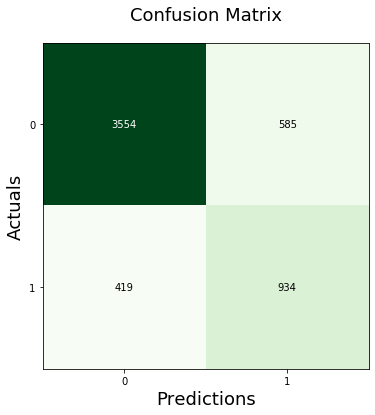

array([[3554,  585],
       [ 419,  934]], dtype=int64)

In [112]:
con_mat = confusion_matrix(y_test, y_pred_xg)
## Confusion Matrix Plot

fig, ax = plot_confusion_matrix(conf_mat=con_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
confusion_matrix(y_test, y_pred_xg)

In [113]:
## Comparision Different models

summary = pd.DataFrame([[lr_acc],[svml_acc],[svmr_acc],[knn_acc],[dt_acc],[rf_acc],[nb_acc], [xg_acc]],index=['Logistic Regression','SVM-(linear-kernerl)', 'SVM-(rbf-kernel)', 'kNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost'],columns=['Accuracy Score'])
summary

,Accuracy Score
Logistic Regression,0.752185
SVM-(linear-kernerl),0.737983
SVM-(rbf-kernel),0.737983
kNN,0.775674
Decision Tree,0.750000
Random Forest,0.775674
Naive Bayes,0.775674
XGBoost,0.817189


#### Cross-Validation 

In [114]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# Applying Stratified k-Fold - Random Forest
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_rf = cross_val_score(rf_clf, X, y, cv=skfold_validator)
skcv_result_rf

array([0.7789512 , 0.78769119, 0.78696286, 0.76656956, 0.79315368,
       0.79497451, 0.78368536, 0.79052823, 0.7989071 , 0.78142077])

In [115]:
# Applying Stratified k-Fold-Logistic Regression
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_lg = cross_val_score(logit_model, X, y, cv=skfold_validator)
skcv_result_lg

array([0.80808449, 0.80954115, 0.81427531, 0.79315368, 0.81937363,
       0.80954115, 0.80954115, 0.82331512, 0.81675774, 0.8010929 ])

In [116]:
# Applying Stratified k-Fold-SVM-linear
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_svml = cross_val_score(svm_clf, X, y, cv=skfold_validator)
skcv_result_svml

array([0.80298616, 0.81063365, 0.81682447, 0.798252  , 0.81828114,
       0.80626366, 0.80844865, 0.81821494, 0.81420765, 0.79781421])

In [118]:
# Applying Stratified k-Fold-SVM-rbf
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_svmr = cross_val_score(svm_clf1, X, y, cv=skfold_validator)
skcv_result_svmr

array([0.80298616, 0.81063365, 0.81682447, 0.798252  , 0.81828114,
       0.80626366, 0.80844865, 0.81821494, 0.81420765, 0.79781421])

In [119]:
# Applying Stratified k-Fold-XGBoost
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_xg = cross_val_score(xgmodel, X, y, cv=skfold_validator)
skcv_result_xg

array([0.8208303 , 0.82228696, 0.82847779, 0.81318281, 0.83466861,
       0.82155863, 0.82774945, 0.8295082 , 0.83242259, 0.82112933])

In [121]:
# Applying Stratified k-Fold-Navive Bayes
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_nb = cross_val_score(classifierNB, X, y, cv=skfold_validator)
skcv_result_nb

array([0.78659869, 0.78951202, 0.78987618, 0.76911872, 0.79461034,
       0.77967953, 0.79096868, 0.78907104, 0.8010929 , 0.78797814])

In [122]:
# Applying Stratified k-Fold-kNN
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_knn = cross_val_score(classifier, X, y, cv=skfold_validator)
skcv_result_knn

array([0.78550619, 0.800437  , 0.80007283, 0.79461034, 0.81136198,
       0.80735615, 0.80298616, 0.80327869, 0.80947177, 0.80400729])

In [125]:
# Applying Stratified k-Fold-decisionTree
skfold_validator = StratifiedKFold(n_splits=10)
skfold_validator.split(X, y)
skcv_result_dt = cross_val_score(dt_clf, X, y, cv=skfold_validator)
skcv_result_dt

array([0.75710124, 0.7607429 , 0.75163875, 0.74617626, 0.76474873,
       0.77713037, 0.76256373, 0.7708561 , 0.76939891, 0.76029144])

In [128]:
skcv_result_lg = np.mean(skcv_result_lg)
skcv_result_knn = np.mean(skcv_result_knn)
skcv_result_svml = np.mean(skcv_result_svml)
skcv_result_svmr = np.mean(skcv_result_svmr)
skcv_result_dt = np.mean(skcv_result_dt)
skcv_result_rf = np.mean(skcv_result_rf)
skcv_result_nb = np.mean(skcv_result_nb)
skcv_result_xg = np.mean(skcv_result_xg)

In [130]:
summary_cv = pd.DataFrame([[skcv_result_lg],[skcv_result_knn],[skcv_result_svml],[skcv_result_svmr],[skcv_result_dt],[skcv_result_rf],[skcv_result_nb],[skcv_result_xg]],index=['Logistic Regression','kNN','SVM-linear','SVM-rbf','Decision Tree','Random Forest','Naive Bayes','XGBoost'],columns=['Accuracy Score'])
print('Accuracy Scores After Cross Validation\n')
print(summary_cv)

Accuracy Scores After Cross Validation

                     Accuracy Score
Logistic Regression        0.810468
kNN                        0.801909
SVM-linear                 0.809193
SVM-rbf                    0.809193
Decision Tree              0.762065
Random Forest              0.786284
Naive Bayes                0.787851
XGBoost                    0.825181


In [ ]:
## XGBoost gives maximum Accuracy

#### Hyper Parameter Tuning XGBoost

In [131]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [132]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [133]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [134]:
classifier=xgboost.XGBClassifier()

In [135]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [136]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable


Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 22.61 seconds.


In [137]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [138]:
random_search.best_params_


{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [157]:
xgmodel=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.4, learning_rate=0.2,
       max_delta_step=0, max_depth=5, min_child_weight=7, missing=1,
       n_estimators=100, n_jobs=0, nthread=None, random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1)

In [158]:
xgmodel.fit(X_train_res, y_train_res)
y_pred_xg = xgmodel.predict(X_test)

In [159]:
accuracy_score(y_test, y_pred_xg)

0.8126365622723962

In [160]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgmodel,X,y,cv=10)

In [161]:
score.mean()

0.8303899031145818

In [ ]:
## For xgboost the score has improved to 0.8303 after the hyper parameter tuning

In [163]:
import xgboost as xgb
 
dmatrix = xgb.DMatrix(data=X, label=y) #Learning API uses a dmatrix
params = {'objective':'reg:squarederror'}
cv_results = xgb.cv(dtrain=dmatrix, 
                    params=params, 
                    nfold=10, 
                    metrics={'rmse'})
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.34


In [165]:
from sklearn.metrics import mean_squared_error
xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train_res, y_train_res)
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 0.36


In [166]:
dmatrix = xgb.DMatrix(data=X, label=y)
params={'objective':'reg:squarederror'}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())


RMSE: 0.34


In [167]:
dmatrix = xgb.DMatrix(data=X, label=y)
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.34


In [168]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}


In [169]:
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.340538532182556


In [173]:
xgmodel=xgboost.XGBClassifier(colsample_bytree=0.7, learning_rate= 0.01, max_depth= 6, n_estimators= 500)



In [174]:
xgmodel.fit(X_train_res, y_train_res)
y_pred_xg = xgmodel.predict(X_test)
accuracy_score(y_test, y_pred_xg)

0.7920611798980335